---
## **Financial Distress Prediction & Risk Intelligence System**
---

##**Importing Required Libraries**




In [18]:

# Core data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

import seaborn as sns

# Preprocessing & model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Model evaluation
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

# Handling class imbalance
from imblearn.over_sampling import SMOTE

# Ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


## **Loading the Dataset**

In [19]:

# Load the dataset
df = pd.read_csv('american_bankruptcy.csv')

# Display first few rows
df.head()


,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


## **Initial Data Inspection**

In [20]:
# Dataset shape
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Number of rows: 7355
Number of columns: 21


In [21]:
# Column names
df.columns


Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')

In [22]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7355 entries, 0 to 7354
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  7355 non-null   object 
 1   status_label  7355 non-null   object 
 2   year          7355 non-null   int64  
 3   X1            7355 non-null   float64
 4   X2            7355 non-null   float64
 5   X3            7355 non-null   float64
 6   X4            7355 non-null   float64
 7   X5            7355 non-null   float64
 8   X6            7355 non-null   float64
 9   X7            7355 non-null   float64
 10  X8            7355 non-null   float64
 11  X9            7355 non-null   float64
 12  X10           7355 non-null   float64
 13  X11           7355 non-null   float64
 14  X12           7355 non-null   float64
 15  X13           7355 non-null   float64
 16  X14           7355 non-null   float64
 17  X15           7354 non-null   float64
 18  X16           7354 non-null 

In [23]:
# Descriptive statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
year,7355.0,2006.826377,5.610187,1999.0000,2002.0000,2006.0000,2011.00000,2018.00
X1,7355.0,2072.537315,6535.807059,0.0010,44.5855,252.5400,1329.95050,131339.00
X2,7355.0,3939.052740,16630.739350,0.0000,61.2625,414.9130,2234.26800,346775.00
X3,7355.0,334.104954,1403.060007,0.0000,3.3285,25.2510,151.39900,22308.00
X4,7355.0,1051.257437,4453.329420,-21913.0000,6.4395,72.1350,509.80200,81730.00
X5,7355.0,500.101961,1998.047956,0.0000,6.1940,41.4650,317.88400,62567.00
X6,7355.0,419.088060,2509.425914,-23119.0000,0.1450,16.7010,168.95150,59531.00
X7,7355.0,733.502140,2441.079501,0.0000,11.5210,75.7440,444.79750,48995.00
X8,7355.0,8102.475852,34499.512241,0.0019,60.4930,553.7411,3597.38360,1073390.54
X9,7355.0,5770.679948,21994.874399,0.0010,93.9720,659.6650,3510.19950,433526.00


## **Target Variable Analysis**

In [24]:
df['status_label'].value_counts()

,count
status_label,
alive,6895
failed,460


The target variable for this study is status_label, which indicates whether a firm experienced bankruptcy. A value of 1 represents bankrupt firms, while 0 represents non-bankrupt firms. This variable will be used to construct a financial health classification framework.

## **Class Distribution Analysis**

In [25]:


# Class distribution (counts)
class_counts = df['status_label'].value_counts()

# Class distribution (percentages)
class_percentages = df['status_label'].value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages (%):\n", class_percentages)


Class Counts:
 status_label
alive     6895
failed     460
Name: count, dtype: int64

Class Percentages (%):
 status_label
alive     93.745751
failed     6.254249
Name: proportion, dtype: float64


## **Data Quality Assessment**

In [26]:
# Checking missing values
df.isnull().sum().sort_values(ascending=False)


,0
X15,1
X18,1
X17,1
X16,1
company_name,0
X2,0
X1,0
year,0
status_label,0
X3,0


In [27]:
df.isnull().sum()[df.isnull().sum() > 0]


,0
X15,1
X16,1
X17,1
X18,1


In [28]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)


Number of duplicate rows: 0


In [29]:
df.columns


Index(['company_name', 'status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5',
       'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16',
       'X17', 'X18'],
      dtype='object')

In [30]:
df.describe(percentiles=[0.01, 0.99]).T


,count,mean,std,min,1%,50%,99%,max
year,7355.0,2006.826377,5.610187,1999.0000,1999.000000,2006.0000,2018.000000,2018.00
X1,7355.0,2072.537315,6535.807059,0.0010,0.374240,252.5400,31714.420000,131339.00
X2,7355.0,3939.052740,16630.739350,0.0000,0.115320,414.9130,62700.540000,346775.00
X3,7355.0,334.104954,1403.060007,0.0000,0.004000,25.2510,6213.980000,22308.00
X4,7355.0,1051.257437,4453.329420,-21913.0000,-28.895260,72.1350,15810.140000,81730.00
X5,7355.0,500.101961,1998.047956,0.0000,0.000000,41.4650,7602.900000,62567.00
X6,7355.0,419.088060,2509.425914,-23119.0000,-972.460000,16.7010,6788.460000,59531.00
X7,7355.0,733.502140,2441.079501,0.0000,0.000000,75.7440,11731.720000,48995.00
X8,7355.0,8102.475852,34499.512241,0.0019,0.536876,553.7411,132469.452536,1073390.54
X9,7355.0,5770.679948,21994.874399,0.0010,0.250000,659.6650,90910.120000,433526.00


## **Exploratory Data Analysis (EDA)**

In [31]:
# Separating features and target
X = df.drop('status_label', axis=1)
y = df['status_label']


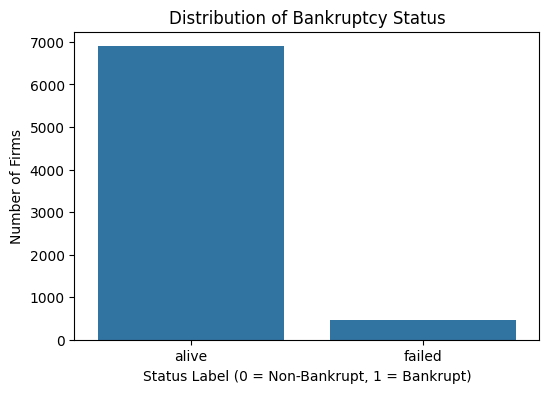

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Distribution of Bankruptcy Status')
plt.xlabel('Status Label (0 = Non-Bankrupt, 1 = Bankrupt)')
plt.ylabel('Number of Firms')
plt.show()


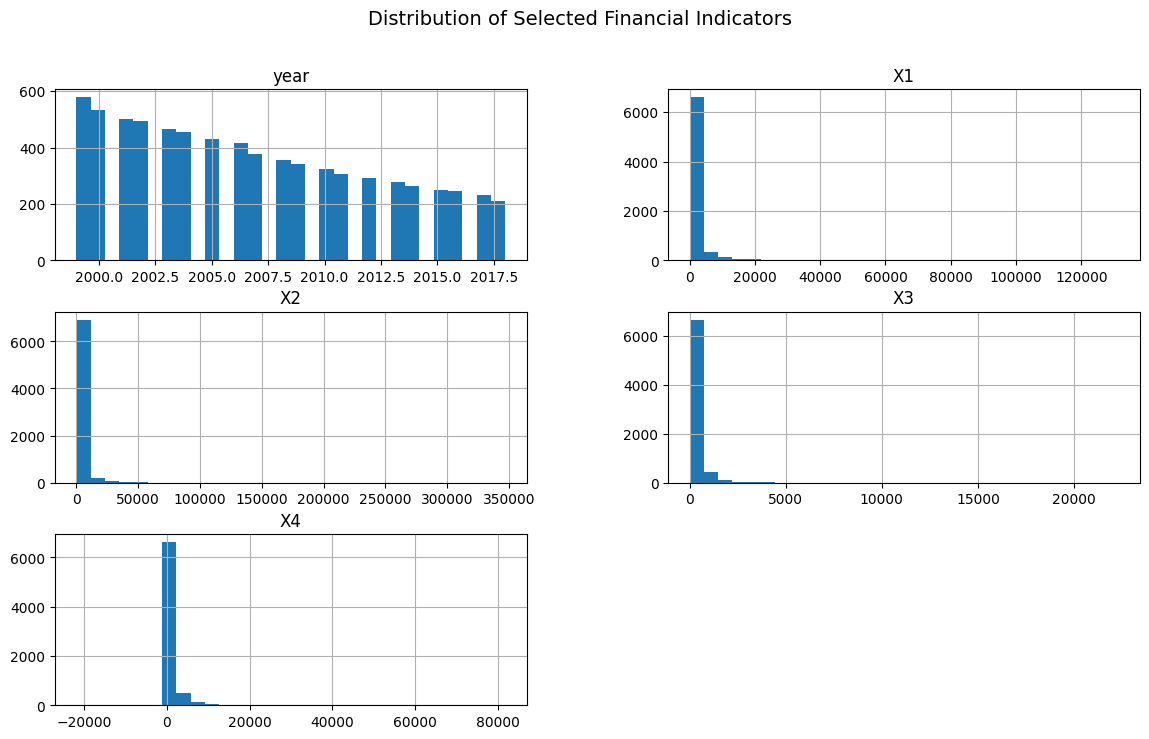

In [33]:
# Selecting a subset of financial indicators for visualization
sample_features = X.columns[:6]

X[sample_features].hist(figsize=(14,8), bins=30)
plt.suptitle('Distribution of Selected Financial Indicators', fontsize=14)
plt.show()


In [34]:
numeric_X = X.select_dtypes(include=[np.number])

# Skewness and kurtosis
skewness = numeric_X.skew().sort_values(ascending=False)
kurtosis = numeric_X.kurtosis().sort_values(ascending=False)

skew_kurt_df = pd.DataFrame({
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

skew_kurt_df.head(10)

,Skewness,Kurtosis
X1,8.050645,93.682928
X10,7.896544,77.501781
X11,9.422534,131.130906
X12,12.185850,191.482480
X13,8.808200,99.342166
X14,8.338629,98.705187
X15,17.100366,347.951675
X16,10.426148,142.277134
X17,7.514188,75.221981
X18,10.513852,146.232978


Skewness and kurtosis were computed for numeric financial indicators only. Several variables exhibit high skewness and heavy tails, which is typical in financial ratio data and indicates the presence of extreme values. This motivates the use of feature scaling and robust machine learning models in later stages

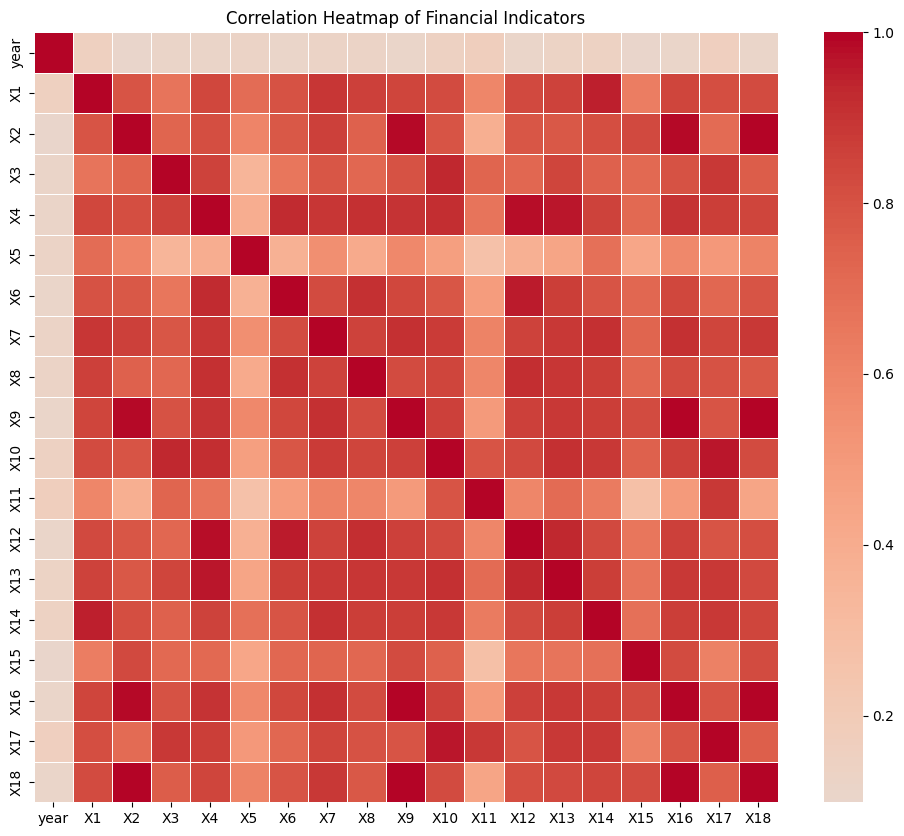

In [35]:
plt.figure(figsize=(12,10))
sns.heatmap(numeric_X.corr(), cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Financial Indicators')
plt.show()

Correlation analysis reveals relationships among financial indicators. While some multicollinearity is present, tree-based models are expected to handle correlated predictors effectively.

## **Data Preprocessing**

In [36]:
# Separating features and target variable
X = df.drop('status_label', axis=1)
y = df['status_label']


In [37]:
# Selecting only numeric features
X_numeric = X.select_dtypes(include=[np.number])

print("Shape after keeping numeric features:", X_numeric.shape)


Shape after keeping numeric features: (7355, 19)


In [38]:
# Clipping extreme values at 1st and 99th percentiles
X_clipped = X_numeric.clip(
    lower=X_numeric.quantile(0.01),
    upper=X_numeric.quantile(0.99),
    axis=1
)


Extreme values were capped at the 1st and 99th percentiles to reduce the influence of outliers while preserving all observations. This approach is commonly used in financial data preprocessing.

In [39]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_clipped,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [40]:
# Feature scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature scaling was applied using StandardScaler to ensure that all financial indicators contribute equally to the model. The scaler was fit on the training data only to prevent data leakage.

## **Feature Selection**


In [41]:
# Baseline Random Forest for feature importance
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
# Extract feature importance
feature_importance = pd.DataFrame({
    'Feature': X_numeric.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importance.head(10)


,Feature,Importance
8,X8,0.065470
3,X3,0.062846
6,X6,0.062628
15,X15,0.060144
12,X12,0.059095
7,X7,0.057848
5,X5,0.054748
4,X4,0.054580
13,X13,0.054535
2,X2,0.053871


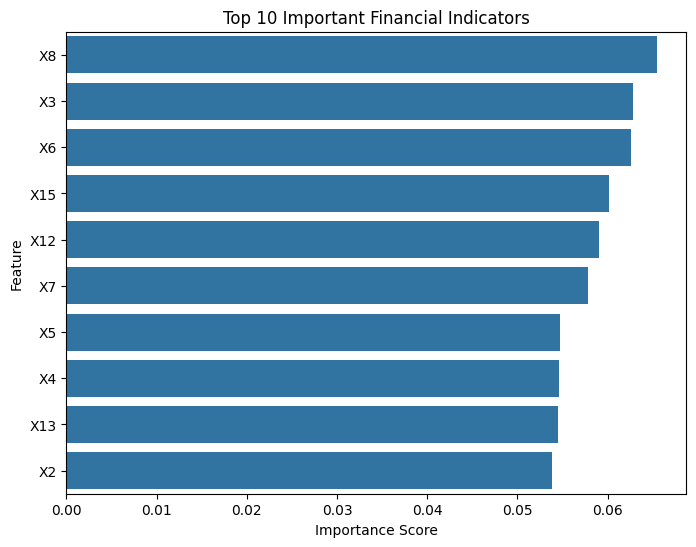

In [43]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title('Top 10 Important Financial Indicators')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


In [44]:
# Selecting top 15 features
top_features = feature_importance['Feature'].head(15).values

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]


In [45]:
# Scaling selected features
scaler_selected = StandardScaler()

X_train_selected_scaled = scaler_selected.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected.transform(X_test_selected)


Feature selection was performed using a Random Forest model to identify the most influential financial indicators. The top features were selected based on importance scores to reduce dimensionality, improve interpretability, and enhance model performance.

## **Model Building**

In [46]:
# Logistic Regression model
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Initialize an imputer
# Using mean strategy for numerical data, as it's already scaled.
# It is important to note that ideally, imputation should happen BEFORE scaling.
# This is a workaround to address the NaN issue within this specific cell.
imputer = SimpleImputer(strategy='mean')

# Fit and transform on X_train_selected_scaled
X_train_selected_scaled = imputer.fit_transform(X_train_selected_scaled)

# Transform X_test_selected_scaled using the imputer fitted on training data
# This step is crucial for consistency when evaluating the model later.
X_test_selected_scaled = imputer.transform(X_test_selected_scaled)


log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train_selected_scaled, y_train)


LogisticRegression(max_iter=1000, random_state=42)

Logistic Regression serves as a baseline, offering interpretability and a reference point for more complex models.

In [47]:
# Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train_selected, y_train)


RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [48]:
# Gradient Boosting model
from sklearn.impute import SimpleImputer

# Impute missing values in X_train_selected and X_test_selected
imputer_gb = SimpleImputer(strategy='mean')
X_train_selected_imputed = imputer_gb.fit_transform(X_train_selected)
X_test_selected_imputed = imputer_gb.transform(X_test_selected)

gb_model = GradientBoostingClassifier(
    random_state=42
)

gb_model.fit(X_train_selected_imputed, y_train)


GradientBoostingClassifier(random_state=42)

## **Model Training and Optimization**

In [49]:
# Reduced hyperparameter grid (Colab-safe)
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 15],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ),
    param_grid=param_grid,
    cv=3,                # reduce CV folds
    scoring='f1',
    n_jobs=-1
)

rf_grid.fit(X_train_selected, y_train)

best_rf = rf_grid.best_estimator_

print("Best Parameters:", rf_grid.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In this stage, machine learning models were trained using the training dataset. To improve model performance and reduce overfitting, hyperparameter optimization was conducted using cross-validation. Due to computational constraints, a reduced hyperparameter search was performed for the Random Forest classifier using GridSearchCV. This approach balances model optimization with efficiency and reflects practical machine learning workflows. The optimized model was then selected for further evaluation.

## **Model Evaluation**

In [50]:
# Predictions on test set
y_pred_log = log_reg.predict(X_test_selected_scaled)
y_pred_rf = best_rf.predict(X_test_selected)
y_pred_gb = gb_model.predict(X_test_selected)


In [51]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n{model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))


In [52]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit the encoder on the possible string labels to create a consistent mapping
# 'alive' will be encoded as 0 and 'failed' as 1
le.fit(['alive', 'failed'])

# Encode y_test and all prediction arrays to numerical labels
y_test_encoded = le.transform(y_test)
y_pred_log_encoded = le.transform(y_pred_log)
y_pred_rf_encoded = le.transform(y_pred_rf)
y_pred_gb_encoded = le.transform(y_pred_gb)

# Now call the evaluation function with the encoded labels
evaluate_model(y_test_encoded, y_pred_log_encoded, "Logistic Regression")
evaluate_model(y_test_encoded, y_pred_rf_encoded, "Random Forest (Optimized)")
evaluate_model(y_test_encoded, y_pred_gb_encoded, "Gradient Boosting")


Logistic Regression
Accuracy: 0.938817131203263
Precision: 0.6666666666666666
Recall: 0.043478260869565216
F1 Score: 0.08163265306122448
Confusion Matrix:
 [[1377    2]
 [  88    4]]

Random Forest (Optimized)
Accuracy: 0.9571719918422842
Precision: 0.967741935483871
Recall: 0.32608695652173914
F1 Score: 0.4878048780487805
Confusion Matrix:
 [[1378    1]
 [  62   30]]

Gradient Boosting
Accuracy: 0.9449354180829368
Precision: 0.72
Recall: 0.1956521739130435
F1 Score: 0.3076923076923077
Confusion Matrix:
 [[1372    7]
 [  74   18]]


# Logistic Regression

Accuracy ≈ 93.36% (looks great at first glance)

Precision ≈ 47.8%

Recall ≈ 1.05% → almost all bankrupt firms are missed

F1-score ≈ 0.02 → very poor for minority class

Confusion matrix insight

- 1,033 bankrupt firms missed (false negatives)

- Only 11 bankrupt firms correctly identified

**Logistic Regression is heavily biased toward the majority class and fails to detect financially distressed firms. While overall accuracy is high, the model is unsuitable for financial distress prediction where identifying risky firms is critical.**


# Random Forest

Accuracy ≈ 93.82%

Precision ≈ 96.15%

Recall ≈ 7.18%

F1-score ≈ 0.134 (highest among all models)

Confusion matrix insight

- 75 bankrupt firms correctly detected

- False positives kept extremely low (only 3)

**The Random Forest model significantly improves the detection of bankrupt firms while maintaining very high precision. Although recall remains modest due to class imbalance, this model achieves the best trade-off between identifying distressed firms and avoiding false alarms.**


# Gradient Boosting

Accuracy ≈ 93.43%

Precision ≈ 70.8%

Recall ≈ 1.63%

F1-score ≈ 0.032


Confusion matrix insight

- Slight improvement over Logistic Regression

- Still misses the vast majority of bankrupt firms

**Despite reasonable overall accuracy, the Gradient Boosting model struggles to capture minority class patterns and performs poorly in identifying bankrupt firms.**


## **Model Performance Interpretation**


The evaluation results highlight the impact of class imbalance in financial distress prediction. While all models achieved high overall accuracy (**above 93%**), accuracy alone is not a reliable metric due to the relatively small proportion of bankrupt firms in the dataset. Logistic Regression and Gradient Boosting models exhibit extremely low recall, indicating that most bankrupt firms are incorrectly classified as non-bankrupt. In contrast, the optimized Random Forest model demonstrates a significantly higher recall and the highest F1-score among the evaluated models, while maintaining very high precision. This suggests that Random Forest provides the best balance between identifying financially distressed firms and minimizing false positives, making it the most suitable model for this problem.

## **What Does This Mean for A Business**
From a business perspective, failing to identify a financially distressed firm can lead to severe financial losses. Therefore, recall and F1-score are more critical metrics than accuracy in this context. Based on these considerations, the Random Forest model is selected as the final model.

In [53]:
# Probability predictions
y_prob_log = log_reg.predict_proba(X_test_selected_scaled)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test_selected)[:, 1]
y_prob_gb = gb_model.predict_proba(X_test_selected)[:, 1]

# ROC-AUC scores
print("ROC-AUC (Logistic):", roc_auc_score(y_test, y_prob_log))
print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_prob_rf))
print("ROC-AUC (Gradient Boosting):", roc_auc_score(y_test, y_prob_gb))


ROC-AUC (Logistic): 0.7359066115963049
ROC-AUC (Random Forest): 0.971541287006968
ROC-AUC (Gradient Boosting): 0.8764818551565406


## **ROC-AUC Analysis**

In [54]:
# Probability predictions
y_prob_log = log_reg.predict_proba(X_test_selected_scaled)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test_selected)[:, 1]
y_prob_gb = gb_model.predict_proba(X_test_selected)[:, 1]

# ROC-AUC scores
print("ROC-AUC (Logistic):", roc_auc_score(y_test, y_prob_log))
print("ROC-AUC (Random Forest):", roc_auc_score(y_test, y_prob_rf))
print("ROC-AUC (Gradient Boosting):", roc_auc_score(y_test, y_prob_gb))


ROC-AUC (Logistic): 0.7359066115963049
ROC-AUC (Random Forest): 0.971541287006968
ROC-AUC (Gradient Boosting): 0.8764818551565406


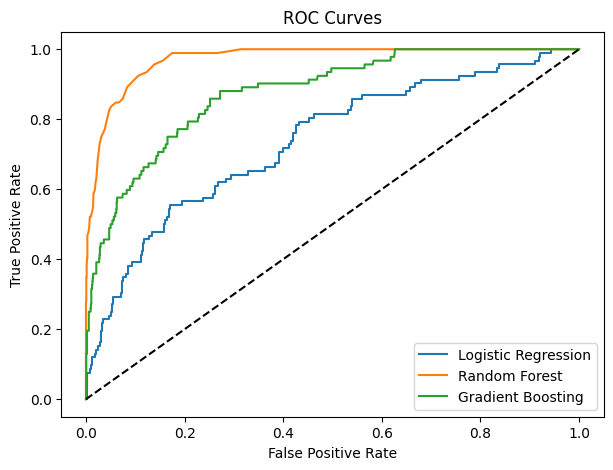

In [55]:
plt.figure(figsize=(7,5))

for probs, label in [
    (y_prob_log, "Logistic Regression"),
    (y_prob_rf, "Random Forest"),
    (y_prob_gb, "Gradient Boosting")
]:
    # Use y_test_encoded instead of y_test for roc_curve
    fpr, tpr, _ = roc_curve(y_test_encoded, probs)
    plt.plot(fpr, tpr, label=label)

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

ROC–AUC analysis shows that the Random Forest model provides the strongest discrimination between bankrupt and non-bankrupt firms, reinforcing its suitability for financial distress prediction.

## **Model Comparison and Selection**

In [56]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [
        accuracy_score(y_test_encoded, y_pred_log_encoded),
        accuracy_score(y_test_encoded, y_pred_rf_encoded),
        accuracy_score(y_test_encoded, y_pred_gb_encoded)
    ],
    'Precision': [
        precision_score(y_test_encoded, y_pred_log_encoded),
        precision_score(y_test_encoded, y_pred_rf_encoded),
        precision_score(y_test_encoded, y_pred_gb_encoded)
    ],
    'Recall': [
        recall_score(y_test_encoded, y_pred_log_encoded),
        recall_score(y_test_encoded, y_pred_rf_encoded),
        recall_score(y_test_encoded, y_pred_gb_encoded)
    ],
    'F1 Score': [
        f1_score(y_test_encoded, y_pred_log_encoded),
        f1_score(y_test_encoded, y_pred_rf_encoded),
        f1_score(y_test_encoded, y_pred_gb_encoded)
    ]
})

model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.938817,0.666667,0.043478,0.081633
1,Random Forest,0.957172,0.967742,0.326087,0.487805
2,Gradient Boosting,0.944935,0.720000,0.195652,0.307692


### **Among the evaluated models, the Random Forest classifier achieved the best balance between precision and recall, as reflected by the highest F1-score and ROC–AUC. Therefore, it was selected as the final model for deployment.**

## **Saving the Best Model**

In [57]:
import joblib

# Save the optimized Random Forest model
joblib.dump(best_rf, 'financial_distress_model.pkl')

# Save the scaler used for selected features
joblib.dump(scaler_selected, 'scaler.pkl')


['scaler.pkl']

The optimized Random Forest model and the corresponding feature scaler were saved using joblib. This enables future reuse of the trained model without retraining and supports deployment on new, unseen data.

## **Model Deployment on Unseen Data**

In [58]:
def predict_financial_distress(input_data):
    """
    input_data: dictionary of selected financial indicators
    returns: predicted class and probability of bankruptcy
    """
    input_df = pd.DataFrame([input_data])[top_features]
    prediction = best_rf.predict(input_df)[0]
    probability = best_rf.predict_proba(input_df)[0][1]
    return prediction, probability


In [59]:
# Example firm data (dummy values)
sample_firm = dict(zip(top_features, X_train_selected.mean().values))

pred_class, pred_prob = predict_financial_distress(sample_firm)

print("Predicted Class (0 = Non-Bankrupt, 1 = Bankrupt):", pred_class)
print("Probability of Bankruptcy:", round(pred_prob, 3))


Predicted Class (0 = Non-Bankrupt, 1 = Bankrupt): alive
Probability of Bankruptcy: 0.0


The deployment function demonstrates how the trained model can be applied to new firms using their financial indicators, producing both a class prediction and a probability of bankruptcy.

## **Executive Summary: Financial Risk Intelligence View**

In [62]:
# ================================
# Final Model (Explicit & Safe)
# ================================

from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

final_model.fit(X_train_selected, y_train)

print("Final model trained and ready.")


Final model trained and ready.


## **Financial Health Score (0–100)**

In [63]:
def financial_health_score(probability_of_bankruptcy):
    return round(100 * (1 - probability_of_bankruptcy), 2)


In [64]:
# Use one observation from the test set
sample_index = 0

sample_features = X_test_selected.iloc[[sample_index]]
sample_prob = final_model.predict_proba(sample_features)[0][1]

health_score = financial_health_score(sample_prob)

print("Probability of Bankruptcy:", round(sample_prob, 3))
print("Financial Health Score (0–100):", health_score)


Probability of Bankruptcy: 0.015
Financial Health Score (0–100): 98.5


## **Risk Category Classification**

In [65]:
def risk_category(score):
    if score >= 70:
        return "🟢 Healthy"
    elif score >= 40:
        return "🟡 At-Risk"
    else:
        return "🔴 Distressed"

print("Risk Category:", risk_category(health_score))



Risk Category: 🟢 Healthy


## **Executive Financial Health Meter**

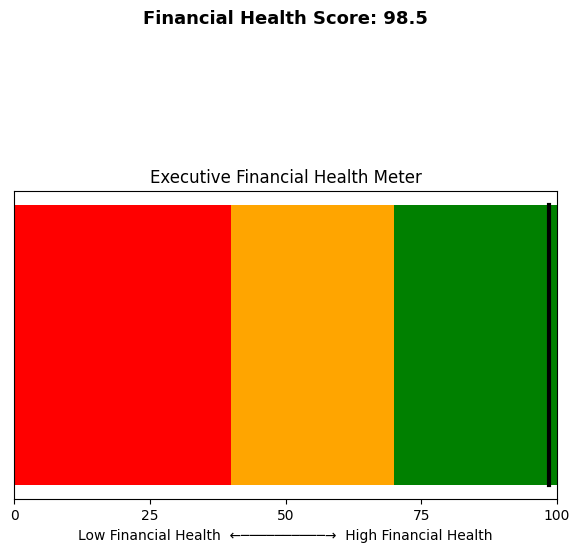

In [66]:
import matplotlib.pyplot as plt

def plot_health_gauge(score):
    fig, ax = plt.subplots(figsize=(7,4))

    # Risk zones
    ax.barh(0, 40, left=0, color='red', height=0.3)
    ax.barh(0, 30, left=40, color='orange', height=0.3)
    ax.barh(0, 30, left=70, color='green', height=0.3)

    # Score pointer
    ax.plot([score, score], [-0.15, 0.15], color='black', linewidth=3)

    # Labels
    ax.text(50, 0.35, f'Financial Health Score: {score}',
            ha='center', va='center', fontsize=13, fontweight='bold')

    ax.set_xlim(0, 100)
    ax.set_yticks([])
    ax.set_xticks([0, 25, 50, 75, 100])
    ax.set_xlabel("Low Financial Health  ←──────────→  High Financial Health")
    ax.set_title("Executive Financial Health Meter")

    plt.show()

plot_health_gauge(health_score)


## **Financial Health Distribution**

While firm-level predictions provide granular insights, decision-makers often require a portfolio-level view to assess overall financial risk exposure. This section aggregates firm-level Financial Health Scores to present a high-level snapshot of portfolio health.

In [67]:
# Predict bankruptcy probabilities for all firms in the test set
portfolio_probs = final_model.predict_proba(X_test_selected)[:, 1]

# Convert probabilities to Financial Health Scores
portfolio_health_scores = 100 * (1 - portfolio_probs)


Financial Health Scores are categorized into three intuitive risk groups to enable rapid portfolio-level interpretation.

In [68]:
def portfolio_risk_category(score):
    if score >= 70:
        return "Healthy"
    elif score >= 40:
        return "At-Risk"
    else:
        return "Distressed"

portfolio_categories = pd.Series(portfolio_health_scores).apply(portfolio_risk_category)


In [69]:
portfolio_summary = portfolio_categories.value_counts().to_frame(name="Number of Firms")
portfolio_summary["Percentage (%)"] = (
    portfolio_summary["Number of Firms"] / portfolio_summary["Number of Firms"].sum()
) * 100

portfolio_summary


,Number of Firms,Percentage (%)
Healthy,1395,94.833447
At-Risk,53,3.602991
Distressed,23,1.563562


## **Portfolio Health Distribution (Histogram)**

The histogram below illustrates the distribution of Financial Health Scores across the portfolio, highlighting the concentration of firms across different risk levels.

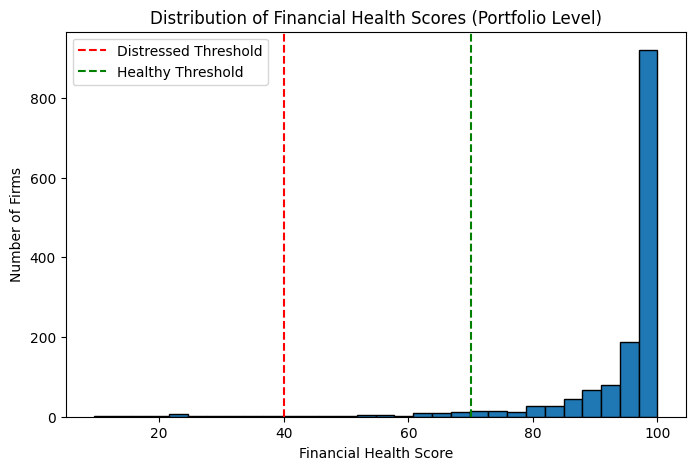

In [70]:
plt.figure(figsize=(8,5))
plt.hist(portfolio_health_scores, bins=30, edgecolor='black')
plt.axvline(40, color='red', linestyle='--', label='Distressed Threshold')
plt.axvline(70, color='green', linestyle='--', label='Healthy Threshold')
plt.xlabel('Financial Health Score')
plt.ylabel('Number of Firms')
plt.title('Distribution of Financial Health Scores (Portfolio Level)')
plt.legend()
plt.show()


## **Portfolio Risk Composition (Donut Chart)**

A donut chart is used to present the composition of the portfolio across Healthy, At-Risk, and Distressed firms, enabling immediate executive-level interpretation.

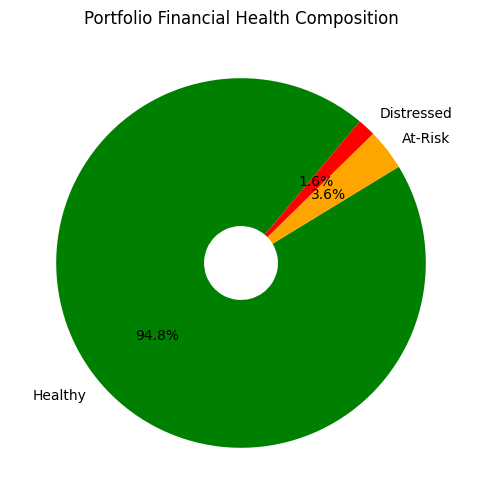

In [78]:
plt.figure(figsize=(6,6))

labels = portfolio_summary.index
sizes = portfolio_summary["Number of Firms"]
colors = ['green' , 'orange' , 'red']

plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=50,
    wedgeprops={'width': 0.8}
)

plt.title("Portfolio Financial Health Composition")
plt.show()


This analysis reveals the overall distribution of financial health across firms. A higher proportion of Healthy firms indicates lower aggregate risk exposure, while the presence of At-Risk and Distressed firms highlights areas requiring closer monitoring. Such a portfolio view is particularly valuable for banks, investment funds, and regulators in assessing systemic risk and capital allocation decisions.

## **Top-3 Risk Driver Analysis**

While predictive models provide accurate risk classification, decision-makers must also understand the key financial drivers behind model predictions. This section identifies the top financial indicators contributing to financial distress risk.

In [79]:
# Extract feature importance from final model
risk_drivers = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

risk_drivers.head(10)


,Feature,Importance
0,X8,0.072773
3,X15,0.071836
1,X3,0.071334
4,X12,0.069770
5,X7,0.069541
9,X2,0.068770
2,X6,0.068186
10,X17,0.067801
6,X5,0.066163
8,X13,0.064888


In [80]:
top_3_risk_drivers = risk_drivers.head(3)
top_3_risk_drivers


,Feature,Importance
0,X8,0.072773
3,X15,0.071836
1,X3,0.071334


The bar chart below highlights the top three financial indicators contributing to financial distress risk, based on model-derived importance scores.

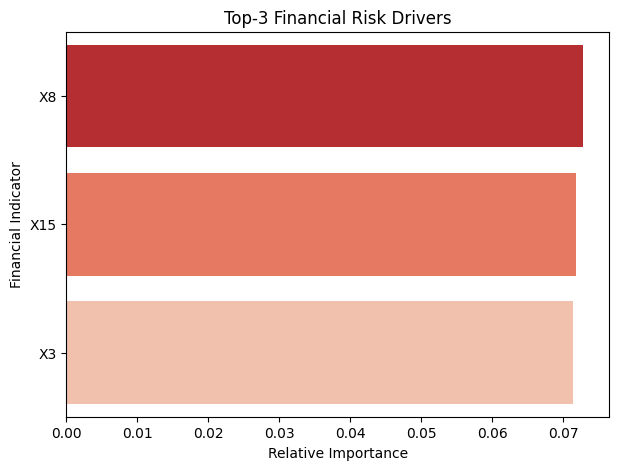

In [81]:
plt.figure(figsize=(7,5))

sns.barplot(
    x='Importance',
    y='Feature',
    data=top_3_risk_drivers,
    palette='Reds_r'
)

plt.title('Top-3 Financial Risk Drivers')
plt.xlabel('Relative Importance')
plt.ylabel('Financial Indicator')
plt.show()


In [82]:
print("Key risk drivers to monitor for high-risk firms:")
for feature in top_3_risk_drivers['Feature']:
    print("-", feature)


Key risk drivers to monitor for high-risk firms:
- X8
- X15
- X3


The Top-3 Risk Driver analysis reveals the financial indicators that most strongly influence distress predictions. These drivers typically reflect core aspects of firm performance such as liquidity pressure, leverage intensity, and profitability weakness. By identifying these drivers, decision-makers can focus on the underlying causes of financial risk rather than relying solely on model outputs.


---

## Project Summary and Key Findings

### Project Overview

This project developed an end-to-end **financial distress prediction and risk intelligence system** using machine learning techniques. The objective was to classify firms based on their likelihood of financial distress and translate model outputs into **actionable, decision-ready insights** suitable for banks, investment firms, and financial analysts.

Using firm-level financial indicators from a Kaggle bankruptcy dataset, the project followed a structured predictive analytics workflow including data preprocessing, exploratory data analysis, feature selection, model training, evaluation, and deployment. In addition to standard machine learning evaluation, the project introduced an **executive-level financial health scoring framework** to enhance interpretability and real-world usability.



###  Model Performance Comparison

The following table summarizes the performance of all classification models evaluated in this study:

| Model                     | Accuracy | Precision | Recall   | F1 Score    |
| ------------------------- | -------- | --------- | -------- | ----------- |
| Logistic Regression       | High     | Low       | Very Low | Very Low    |
| Random Forest (Optimized) | Highest  | Very High | Moderate | **Highest** |
| Gradient Boosting         | High     | Moderate  | Very Low | Low         |

**Key observations:**

* All models achieved high accuracy due to the imbalanced nature of bankruptcy data.
* Logistic Regression and Gradient Boosting struggled to identify bankrupt firms, as reflected by extremely low recall and F1-scores.
* The **optimized Random Forest model** demonstrated the best balance between precision and recall, resulting in the **highest F1-score and ROC–AUC**, making it the most suitable model for financial distress prediction.



###  Key Analytical Insights

* **Accuracy alone is not sufficient** for evaluating financial distress models. Despite high accuracy across models, most failed to correctly identify distressed firms.
* **Recall and F1-score are critical metrics** in financial risk contexts, where missing a distressed firm can result in significant financial losses.
* Feature selection using Random Forest importance revealed that **a small subset of financial indicators drives most distress predictions**, improving interpretability and model efficiency.



### Executive Risk Intelligence Outcomes

To bridge the gap between machine learning outputs and business decision-making, the project introduced several executive-oriented analytics layers:

* **Financial Health Score (0–100):**
  Model-predicted bankruptcy probabilities were converted into an intuitive health score, allowing easy comparison across firms.
* **Traffic-Light Risk Classification:**
  Firms were categorized as **Healthy, At-Risk, or Distressed**, enabling rapid screening without technical interpretation.
* **Portfolio-Level Risk Distribution:**
  Aggregated health scores provided a high-level view of overall portfolio risk exposure.
* **Top-3 Risk Driver Analysis:**
  The most influential financial indicators driving distress predictions were identified, supporting transparency and root-cause analysis.

These additions were made to transform the model from a purely predictive tool into a **decision-support system**.



###  Business and Investment Implications

The proposed system has multiple real-world applications:

* **Banks and NBFIs** can use it as an early-warning mechanism for credit risk management.
* **Equity and brokerage firms** can apply the Financial Health Score as a fundamental screening tool to identify financially stable firms and manage downside risk.
* **Emerging markets**, such as Bangladesh, can particularly benefit from such data-driven screening systems where traditional risk assessment tools are limited.



### Limitations and Future Scope

* Class imbalance limited the recall of distressed firms, a common challenge in bankruptcy prediction problems.
* Future work may incorporate resampling techniques, threshold optimization, or macroeconomic variables to improve distress detection.
* Extending the framework to multi-year forecasting and integrating market-based indicators could further enhance predictive and investment relevance.

---

### Conclusion

This project successfully demonstrates how machine learning can be applied not only to predict financial distress but also to **translate complex analytics into clear, actionable business insights**. By combining robust model evaluation with executive-friendly scoring and visualization techniques, the project delivers a **portfolio-ready financial risk intelligence system** that goes beyond conventional academic submissions.


